In [12]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


In [13]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/m3gofriends/My-Machine-and-Deep-Learning-Template-main/main/TrainingSet/iris.csv?token=GHSAT0AAAAAABYGU6UF4HT32E6HQ2BMRJJGYYVNHTQ", 
    na_values=['NA', '?'])

In [15]:
df.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# Convert to numpy - Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values

In [17]:
y.shape

(150, 3)

In [18]:
# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100
5/5 - 1s - loss: 1.0490 - 648ms/epoch - 130ms/step
Epoch 2/100
5/5 - 0s - loss: 0.9462 - 15ms/epoch - 3ms/step
Epoch 3/100
5/5 - 0s - loss: 0.8612 - 14ms/epoch - 3ms/step
Epoch 4/100
5/5 - 0s - loss: 0.8014 - 19ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 0.7493 - 14ms/epoch - 3ms/step
Epoch 6/100
5/5 - 0s - loss: 0.7017 - 14ms/epoch - 3ms/step
Epoch 7/100
5/5 - 0s - loss: 0.6579 - 15ms/epoch - 3ms/step
Epoch 8/100
5/5 - 0s - loss: 0.6184 - 15ms/epoch - 3ms/step
Epoch 9/100
5/5 - 0s - loss: 0.5816 - 21ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 0.5492 - 18ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 0.5189 - 14ms/epoch - 3ms/step
Epoch 12/100
5/5 - 0s - loss: 0.4894 - 14ms/epoch - 3ms/step
Epoch 13/100
5/5 - 0s - loss: 0.4654 - 16ms/epoch - 3ms/step
Epoch 14/100
5/5 - 0s - loss: 0.4461 - 12ms/epoch - 2ms/step
Epoch 15/100
5/5 - 0s - loss: 0.4265 - 12ms/epoch - 2ms/step
Epoch 16/100
5/5 - 0s - loss: 0.4093 - 15ms/epoch - 3ms/step
Epoch 17/100
5/5 - 0s - loss: 

In [22]:
# Print out number of species found:
print(species)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [33]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: (150, 3)
[[9.98e-01 2.11e-03 9.23e-09]
 [9.95e-01 4.65e-03 4.99e-08]
 [9.97e-01 3.38e-03 3.59e-08]
 [9.95e-01 4.59e-03 7.21e-08]
 [9.98e-01 1.93e-03 8.83e-09]
 [9.98e-01 1.69e-03 4.59e-09]
 [9.97e-01 3.17e-03 3.78e-08]
 [9.97e-01 2.66e-03 1.61e-08]
 [9.94e-01 6.04e-03 1.52e-07]
 [9.96e-01 3.84e-03 3.43e-08]]


In [34]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")
print(species[predict_classes[0:10]])

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Expected: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Index(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'],
      dtype='object')


In [25]:
print(y[0:10])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [26]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.98


In [27]:
sample_flower = np.array([[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"Predict that {sample_flower} is: {species[pred]}.")

[[3.3657861e-04 2.4158242e-01 7.5808096e-01]]
Predict that [[5. 3. 4. 2.]] is: Iris-virginica.


In [28]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"Predict that these two flowers {sample_flower} are: {species[pred]}.")

[[3.3657864e-04 2.4158238e-01 7.5808102e-01]
 [9.9459368e-01 5.4063462e-03 5.1994224e-08]]
Predict that these two flowers [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] are: Index(['Iris-virginica', 'Iris-setosa'], dtype='object').


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


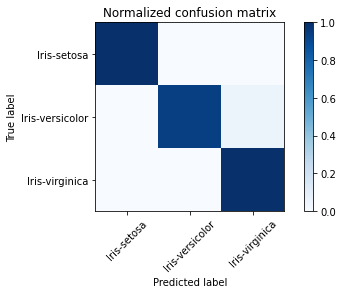

In [36]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(expected_classes, predict_classes)
np.set_printoptions(precision=2)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, species, title='Normalized confusion matrix')

plt.show()